### Lab3. Fuel Amount Prediction using Linear Regression

### Step1. [Prepare your dataset]. Create fuel_data.csv file as shown above.

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("fuel_data.csv")
df

,drivenKM,fuelAmount
0,390.00,3600.0
1,403.00,3705.0
2,396.50,3471.0
3,383.50,3250.5
4,321.10,3263.7
5,391.30,3445.2
6,386.10,3679.0
7,371.80,3744.5
8,404.30,3809.0
9,392.20,3905.0


### Step2. [Import dataset]. Using Pandas, import “fuel_data.csv” file and print properties such as head(), shape, columns, type and info. 

In [3]:
df.head()

,drivenKM,fuelAmount
0,390.0,3600.0
1,403.0,3705.0
2,396.5,3471.0
3,383.5,3250.5
4,321.1,3263.7


In [4]:
df.shape

(19, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   drivenKM    19 non-null     float64
 1   fuelAmount  19 non-null     float64
dtypes: float64(2)
memory usage: 432.0 bytes


In [6]:
df.columns

Index(['drivenKM', 'fuelAmount'], dtype='object')

### Step3. [Preprocessing]. Check for missing values (Use isnull() method)

In [7]:
df.isnull()

,drivenKM,fuelAmount
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


### Step4. [Visualize Relationships]. Plot relplot between “drivenKM” and “fuelAmount”.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

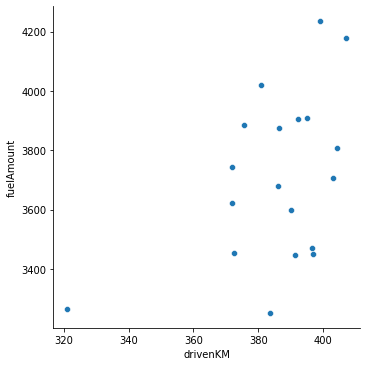

In [9]:
sns.relplot(x="drivenKM", y="fuelAmount",data=df,kind='scatter')

### Step5. [Prepare X matrix and y vector]. Extract “drivenKM” column and store into new dataframe X. Similarly, extract “fuelAmount” and store into y. 

In [10]:
y=df.fuelAmount

In [11]:
data1=['drivenKM']
X=df[data1]

### Step6. [Examine X and y]. Print X, y, type of X and type of y. 

In [12]:
X

,drivenKM
0,390.00
1,403.00
2,396.50
3,383.50
4,321.10
5,391.30
6,386.10
7,371.80
8,404.30
9,392.20


In [13]:
y

0     3600.0
1     3705.0
2     3471.0
3     3250.5
4     3263.7
5     3445.2
6     3679.0
7     3744.5
8     3809.0
9     3905.0
10    3874.0
11    3910.0
12    4020.7
13    3622.0
14    3450.5
15    4179.0
16    3454.2
17    3883.8
18    4235.9
Name: fuelAmount, dtype: float64

In [14]:
print(y.dtypes)
print(X.dtypes)

float64
drivenKM    float64
dtype: object


In [15]:
print(type(y))
print(type(X))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


### Step7. [Split dataset]. Split dataset into 4 parts using train_test_split() method, such as X_train, X_test, y_train and y_test. Use 20% for test size. Later you can play around with this test size. Print the shape of all 4 parts. 

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,test_size=0.2)

In [18]:
X_train, X_test, y_train, y_test

(    drivenKM
 1     403.00
 14    397.00
 18    399.00
 13    372.00
 10    386.43
 6     386.10
 17    375.60
 0     390.00
 15    407.00
 9     392.20
 3     383.50
 12    381.00
 7     371.80
 5     391.30
 4     321.10,
     drivenKM
 2      396.5
 16     372.4
 11     395.2
 8      404.3,
 1     3705.0
 14    3450.5
 18    4235.9
 13    3622.0
 10    3874.0
 6     3679.0
 17    3883.8
 0     3600.0
 15    4179.0
 9     3905.0
 3     3250.5
 12    4020.7
 7     3744.5
 5     3445.2
 4     3263.7
 Name: fuelAmount, dtype: float64,
 2     3471.0
 16    3454.2
 11    3910.0
 8     3809.0
 Name: fuelAmount, dtype: float64)

In [19]:
X_train.shape

(15, 1)

In [20]:
X_test.shape

(4, 1)

In [21]:
y_train.shape

(15,)

In [22]:
y_test.shape

(4,)

### Part-I. Linear Regression Baseline Model 
### Step8. [Build Model]. Create Linear Regression model and train with fit() using X_train and y_train values. 

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

### Step9. [Predict price for 800 KM]. If I need to travel 800 KM, how much do I need to spend on Diesel?

In [25]:
new = [[800]]
y_n= model.predict(new)
y_n

array([6686.10374787])

### Step10. [Predict on entire dataset]. Now, perform prediction using entire X_test and store result as y_pred

In [26]:
y_pred = model.predict(X_test)
y_pred

array([3814.29479572, 3642.76915571, 3805.04237531, 3869.80931822])

### Step11. [Print Mean Squared Error and R2 Error]. Are you getting output “MSE: 46181.0”. Also, print values of model parameters: coef_ and intercept_ values. 

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [28]:
lr_mse=mean_squared_error(y_test,y_pred)
lr_mse

42030.879854472776

In [29]:
r2_score(y_test,y_pred)

-0.03288228157943518

In [30]:
model.coef_

array([7.11724647])

In [31]:
model.intercept_

992.3065688933543

### Part-II. Linear Regression with Scaling using StandardScaler
### Step12. [Normalize X_train and X_test values]. Use StandardScaler, scale X_train using fit_transform() method and X_test using transform() method. 

In [32]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [33]:
ss = scale.fit_transform(X_train)
print(ss)

[[ 0.9780552 ]
 [ 0.67238111]
 [ 0.77427247]
 [-0.60126093]
 [ 0.13388525]
 [ 0.11707318]
 [-0.41785648]
 [ 0.31576133]
 [ 1.18183792]
 [ 0.42784183]
 [-0.0153856 ]
 [-0.1427498 ]
 [-0.61145007]
 [ 0.38199072]
 [-3.19439613]]


In [34]:
ss1 = scale.transform (X_test)
print(ss1)

[[ 0.64690827]
 [-0.58088266]
 [ 0.58067888]
 [ 1.04428458]]


### Step13. [Build LR model]. Create a new LR model, fit on scaled X_train and predict on scaled X_test

In [35]:
model1 = LinearRegression()
model1.fit(ss,y_train)

LinearRegression()

In [36]:
s_y_pred = model1.predict(ss1)
s_y_pred

array([3814.29479572, 3642.76915571, 3805.04237531, 3869.80931822])

### Step14. [Print Mean Squared Error and R2 Error]. What is the output?. MSE reduced or not?. Why?. 

In [37]:
mean_squared_error(y_test,s_y_pred)

42030.87985447279

In [38]:
r2_score(y_test,s_y_pred)

-0.032882281579435624

### Step15. [Plot scatter plot]. Display Scatter Plot between actual y (aka ground truth) vs predicted y values. That is, between y_test and y_pred. 

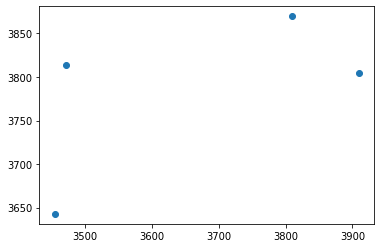

In [39]:
plt.scatter(y_test,y_pred)

### Part-III. Linear Regression with Scaling using MinMaxScaler and Comparison with KNeighborsRegressor and SGDRegressor

### Step16. [Repeat with MinmaxScaler]. Repeat scaling using MinMaxScaler, LR model creation, fit, predict and error computation steps. 


In [40]:
from sklearn.preprocessing import MinMaxScaler
m_scaler = MinMaxScaler()

In [41]:
m_ss = m_scaler.fit_transform(X_train)
m_ss

array([[0.95343423],
       [0.88358556],
       [0.90686845],
       [0.59254948],
       [0.76053551],
       [0.75669383],
       [0.63445867],
       [0.80209546],
       [1.        ],
       [0.82770664],
       [0.72642608],
       [0.69732247],
       [0.59022119],
       [0.81722934],
       [0.        ]])

In [42]:
m_ss1 = m_scaler.transform(X_test)
m_ss1

array([[0.87776484],
       [0.59720605],
       [0.86263097],
       [0.9685681 ]])

In [43]:
model2 = LinearRegression()
model2.fit(m_ss,y_train)

LinearRegression()

In [44]:
ms_y_pred = model2.predict(m_ss1)
ms_y_pred

array([3814.29479572, 3642.76915571, 3805.04237531, 3869.80931822])

In [45]:
mean_squared_error(y_test,ms_y_pred)

42030.87985447284

In [46]:
r2_score(y_test,ms_y_pred)

-0.032882281579436734

### Step17. [Compare KNN Regressor]. Repeat the above steps for KNeighborsRegressor model and compare MSE of LR with KNN Regressor. 

In [47]:
from sklearn.neighbors import KNeighborsRegressor

In [48]:
mod_neigh = KNeighborsRegressor(n_neighbors=5)
mod_neigh.fit(X, y)

KNeighborsRegressor()

In [49]:
n_y_pred = mod_neigh.predict(X)
n_y_pred

array([3700.64, 3875.88, 3794.48, 3684.84, 3593.64, 3746.84, 3684.84,
       3745.04, 3875.88, 3666.24, 3569.74, 3794.48, 3741.6 , 3745.04,
       3794.48, 3875.88, 3745.04, 3745.04, 3754.48])

In [50]:
knn_mse=mean_squared_error(y,n_y_pred)
knn_mse

70460.30507368421

In [51]:
r2_score(y,n_y_pred)

0.06403925984775638

### Step18. [Compare SGD Regressor]. Repeat the above steps for SGDRegressor model and compare MSE of LR with SGD Regressor. 

In [52]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline

In [53]:
reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [54]:
r_y_pred = reg.predict(X)
r_y_pred

array([3740.57047646, 3830.21877598, 3785.39462622, 3695.7463267 ,
       3265.43448899, 3749.53530641, 3713.6759866 , 3615.06285713,
       3839.18360593, 3755.74172714, 3715.9516742 , 3776.42979627,
       3678.50626909, 3616.44206173, 3788.84263774, 3857.80286814,
       3619.20047095, 3641.26774468, 3802.63468382])

In [55]:
sgdr_mse=mean_squared_error(y,r_y_pred)
sgdr_mse

58823.8671411817

In [56]:
r2_score(y,r_y_pred)

0.21861209413581573

### Step19. [Select best model]. Tabulate MSE values of LR, KNNR and SGDR and select the model with the lowest MSE. 

In [57]:
print("LR model ",lr_mse)
print("KNNR model ",knn_mse)
print("SGDR model ",sgdr_mse)

LR model  42030.879854472776
KNNR model  70460.30507368421
SGDR model  58823.8671411817
